In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

<br>

## 다중분류 Multi-Classification (로이터 통신 뉴스기사 문제)
- 46개의 토픽이 있고, 각 토픽은 훈련세트에 최소 10개의 샘플을 가지고 있다.
- 클래스가 많기 때문에 다중분류의 예 이다.

In [2]:
# 케라스 라이브러리 안에 저장되어 있는 데이터 셋 로드하기
# IMDB 데이터셋에서처럼 num_words=10000 매개변수는 데이터에서 가장 자주 등장하는 단어 10,000개로 제한합니다.

from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 2s 1us/step


In [4]:
#여기에는 8,982개의 훈련 샘플과 2,246개의 테스트 샘플이 있습니다:


print(len(train_data))
print(len(test_data))

8982
2246


In [5]:
# IMDB 리뷰처럼 각 샘플은 `정수 리스트`입니다(단어 인덱스):
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
# 원문으로 디코딩 해보기

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_newswire = ' '.join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

557056/550378 [==============================] - 1s 2us/step


In [7]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [9]:
# 데이터 인코딩 하기(레이블을 벡터로 바꾸기)

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

<br>

## 모델 구성
- 이전에 영화 리뷰와 다른 점: 출력(Output)의 개수가 2개에서 46개로 늘어난 점.

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))     # 출력 층의 노드가 46이라는건 46차원의 벡터(2D텐서) 출력한다는 의미
# 마지막 층에 softmax를 사용한다는 거는 46개의 클래스에 대한 확률분포를 계산하겠다는 뜻

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 413us/step - loss: 2.5321 - acc: 0.4956 - val_loss: 1.7208 - val_acc: 0.6110
Epoch 2/20
7982/7982 [==============================] - 2s 254us/step - loss: 1.4451 - acc: 0.6878 - val_loss: 1.3458 - val_acc: 0.7070
Epoch 3/20
7982/7982 [==============================] - 2s 230us/step - loss: 1.0955 - acc: 0.7648 - val_loss: 1.1706 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 2s 235us/step - loss: 0.8699 - acc: 0.8161 - val_loss: 1.0811 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 2s 234us/step - loss: 0.7033 - acc: 0.8477 - val_loss: 0.9847 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 2s 230us/step - loss: 0.5667 - acc: 0.8792 - val_loss: 0.9416 - val_acc: 0.8020
Epoch 7/20
7982/7982 [==============================] - 2s 226us/step - loss: 0.4583 - a

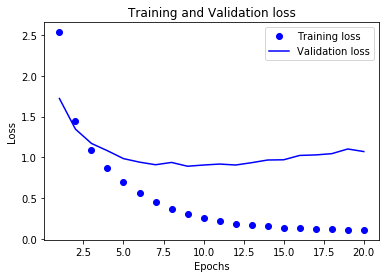

In [16]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

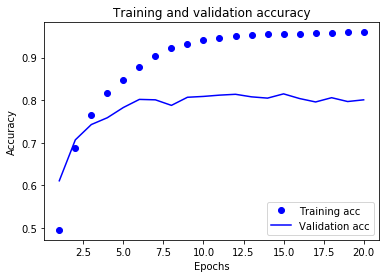

In [17]:
plt.clf()   # 그래프를 초기화합니다

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [19]:
predictions = model.predict(x_test)
# predict 메소드는 46개의 토픽에 대한 확률분포를 반환한다.

In [20]:
print(predictions[0].shape)        # 각 항목의 길이가 46
print(np.sum(predictions[0]))      # 벡터 원소들의 합은 1
print(np.argmax(predictions[0]))   # 가장 확률이 높은 클래스

(46,)
0.99999994
3
